In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

sns.set_style("whitegrid", {'grid.linestyle': ':'})


In [25]:
league_df = pd.read_excel('data/players.xlsx',sheet_name="league_data")
league_df.shape


(500, 115)

In [26]:
col_names = {col_name:col_name.replace(',','').replace(' ','_')  for col_name in league_df.columns}

league_df.rename(columns=col_names,inplace=True)


list(league_df.columns)

['Player',
 'Team',
 'Team_within_selected_timeframe',
 'Position',
 'Age',
 'Market_value',
 'Contract_expires',
 'Matches_played',
 'Minutes_played',
 'Goals',
 'xG',
 'Assists',
 'xA',
 'Duels_per_90',
 'Duels_won_%',
 'Birth_country',
 'Passport_country',
 'Foot',
 'Height',
 'Weight',
 'On_loan',
 'Successful_defensive_actions_per_90',
 'Defensive_duels_per_90',
 'Defensive_duels_won_%',
 'Aerial_duels_per_90',
 'Aerial_duels_won_%',
 'Sliding_tackles_per_90',
 'PAdj_Sliding_tackles',
 'Shots_blocked_per_90',
 'Interceptions_per_90',
 'PAdj_Interceptions',
 'Fouls_per_90',
 'Yellow_cards',
 'Yellow_cards_per_90',
 'Red_cards',
 'Red_cards_per_90',
 'Successful_attacking_actions_per_90',
 'Goals_per_90',
 'Non-penalty_goals',
 'Non-penalty_goals_per_90',
 'xG_per_90',
 'Head_goals',
 'Head_goals_per_90',
 'Shots',
 'Shots_per_90',
 'Shots_on_target_%',
 'Goal_conversion_%',
 'Assists_per_90',
 'Crosses_per_90',
 'Accurate_crosses_%',
 'Crosses_from_left_flank_per_90',
 'Accurate_cr

In [27]:
imp_cols = [
    'Matches_played',
    'Minutes_played',
    'Goals',
    'Assists',
    'xG',
    'xA',
    'Duels_per_90',
    'Duels_won_%',
    'Successful_attacking_actions_per_90',
    'Goals_per_90',
    'Non-penalty_goals_per_90',
    'xG_per_90',
    'Assists_per_90',
    'Crosses_per_90',
    'Accurate_crosses_%',
    'Dribbles_per_90',
    'Successful_dribbles_%',
    'Offensive_duels_per_90',
    'Offensive_duels_won_%',
    'Touches_in_box_per_90',
    'Progressive_runs_per_90',
    'Through_passes_per_90',
    'Accurate_through_passes_%'
]

imp_cols

['Matches_played',
 'Minutes_played',
 'Goals',
 'Assists',
 'xG',
 'xA',
 'Duels_per_90',
 'Duels_won_%',
 'Successful_attacking_actions_per_90',
 'Goals_per_90',
 'Non-penalty_goals_per_90',
 'xG_per_90',
 'Assists_per_90',
 'Crosses_per_90',
 'Accurate_crosses_%',
 'Dribbles_per_90',
 'Successful_dribbles_%',
 'Offensive_duels_per_90',
 'Offensive_duels_won_%',
 'Touches_in_box_per_90',
 'Progressive_runs_per_90',
 'Through_passes_per_90',
 'Accurate_through_passes_%']

In [28]:
top_wingers = league_df.sort_values(by=imp_cols,ascending=False)[['Player','Team','Position','Height','Minutes_played']+imp_cols]
top_wingers

,Player,Team,Position,Height,Minutes_played,Matches_played,Minutes_played,Goals,Assists,xG,...,Crosses_per_90,Accurate_crosses_%,Dribbles_per_90,Successful_dribbles_%,Offensive_duels_per_90,Offensive_duels_won_%,Touches_in_box_per_90,Progressive_runs_per_90,Through_passes_per_90,Accurate_through_passes_%
276,M. Kilman,Wolverhampton Wanderers,"RCB, LCB",194,2672,26,2672,2,0,2.49,...,0.17,40.00,0.54,75.00,1.52,53.33,0.51,0.77,0.84,28.00
71,W. Saliba,Arsenal,RCB,192,2644,26,2644,2,0,0.77,...,0.10,33.33,0.31,44.44,1.84,35.19,0.31,0.78,0.24,42.86
416,A. Onana,Manchester United,GK,190,2639,26,2639,0,0,0.00,...,0.00,0.00,0.00,0.00,0.03,100.00,0.00,0.00,0.44,46.15
312,J. Pickford,Everton,GK,185,2636,26,2636,0,0,0.00,...,0.00,0.00,0.00,0.00,0.10,66.67,0.00,0.00,0.51,40.00
189,J. Andersen,Crystal Palace,"RCB, CB",192,2635,26,2635,2,2,1.28,...,1.02,53.33,0.92,55.56,1.98,50.00,0.75,0.89,0.92,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,R. Gravenberch,Liverpool,LAMF,190,15,1,15,0,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,H. Ekitike,PSG,CF,189,14,1,14,0,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Thiago Alcântara,Liverpool,"DMF, LCMF",174,13,1,13,0,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,Jonny,Wolverhampton Wanderers,LW,175,11,1,11,0,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
top_dribblers=top_wingers.sort_values(by='Dribbles_per_90',ascending=False)
top_crossers=top_wingers[['Player','Team','Crosses_per_90','Accurate_crosses_%']].sort_values(by=['Crosses_per_90','Accurate_crosses_%'],ascending=False)
filtered_crossers = top_crossers[top_crossers['Accurate_crosses_%'] > 30]

top_dribblers.head(20)

,Player,Team,Position,Height,Minutes_played,Matches_played,Minutes_played,Goals,Assists,xG,...,Crosses_per_90,Accurate_crosses_%,Dribbles_per_90,Successful_dribbles_%,Offensive_duels_per_90,Offensive_duels_won_%,Touches_in_box_per_90,Progressive_runs_per_90,Through_passes_per_90,Accurate_through_passes_%
465,J. Doku,Manchester City,"LAMF, LW, LWF",173,1244,18,1244,2,4,1.58,...,4.85,25.37,14.25,60.91,22.43,49.03,8.32,8.90,0.43,33.33
333,H. Traoré,Napoli,"RCMF, LW, LCMF",177,69,3,69,0,0,0.27,...,2.61,50.00,13.04,40.00,16.96,38.46,1.30,1.30,0.00,0.00
3,Vinícius Júnior,Real Madrid,"CF, LWF",176,1381,17,1381,7,3,6.60,...,3.13,16.67,12.19,49.20,19.49,43.48,6.58,6.39,1.17,50.00
67,O. Dembélé,PSG,"RWF, RW",178,1317,20,1317,1,6,3.31,...,4.31,30.16,11.89,53.45,17.08,46.80,4.85,8.34,1.50,50.00
422,J. Doku,Rennes,RWF,173,121,2,121,1,0,1.16,...,0.74,100.00,11.16,66.67,22.31,63.33,8.18,5.21,0.00,0.00
318,Nico Williams,Athletic Bilbao,"LAMF, LW, RAMF",181,1657,22,1657,3,6,4.46,...,4.40,40.74,10.54,51.55,17.71,41.10,4.62,5.38,0.65,41.67
168,K. Adeyemi,Borussia Dortmund,"LAMF, LWB, LWF",180,450,12,450,0,1,1.34,...,3.20,43.75,10.20,39.22,17.80,32.58,4.60,3.20,0.00,0.00
14,K. Kvaratskhelia,Napoli,"LWF, LW",183,2043,24,2043,8,4,8.84,...,2.60,35.59,10.00,57.27,16.26,50.41,5.24,5.15,0.79,50.00
47,R. Kolo Muani,PSG,CF,187,160,2,160,1,0,1.30,...,0.56,0.00,9.56,52.94,17.44,35.48,5.63,3.38,0.00,0.00
256,M. Olise,Crystal Palace,"RWF, RW, RAMF",176,860,11,860,6,2,3.02,...,3.66,25.71,9.52,71.43,16.85,54.04,3.98,3.66,1.15,45.45


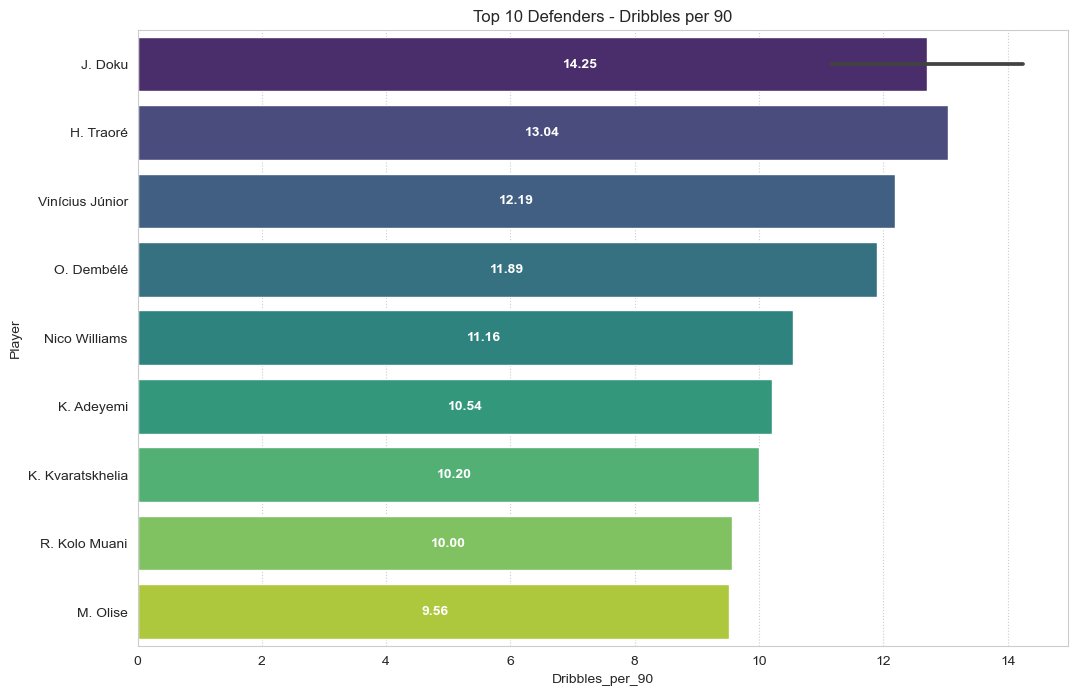

In [30]:


def plot_bar_with_labels(data, x, y, xlabel, ylabel, title, palette='viridis', top_n=10):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=x, y=y, data=data.head(top_n), palette=palette)
    
    # Add labels
    for i, val in enumerate(data.head(top_n)[x]):
        
        # Add white label in the middle
        plt.text(val / 2 , i, f'{val:.2f}', fontsize=10, ha='center', va='center', color='white', weight='bold')
    
    plt.title(title.replace('_',' '))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example usage:
value_column = 'Dribbles_per_90'
plot_bar_with_labels(data=top_dribblers, x=value_column, y='Player', xlabel=value_column, ylabel='Player', title=f'Top 10 Defenders - {value_column}')


In [31]:
filtered_crossers.head()

,Player,Team,Crosses_per_90,Accurate_crosses_%
22,K. De Bruyne,Manchester City,8.81,32.43
310,F. Dimarco,Internazionale,6.58,41.44
348,S. Benrahma,Olympique Lyonnais,5.84,50.00
481,L. Digne,Aston Villa,5.57,37.27
19,Rafael Leão,Milan,5.20,35.19


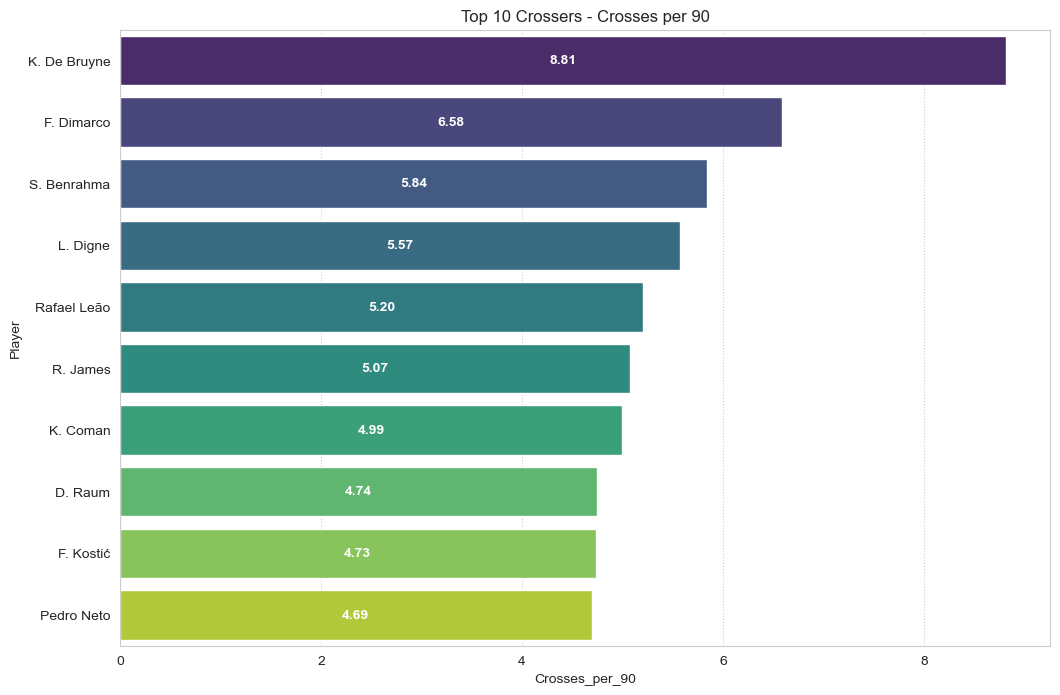

In [32]:
# Example usage:
value_column = 'Crosses_per_90'
plot_bar_with_labels(data=filtered_crossers, x=value_column, y='Player', xlabel=value_column, ylabel='Player', title=f'Top 10 Crossers - {value_column}')


In [33]:
filtered_crossers

,Player,Team,Crosses_per_90,Accurate_crosses_%
22,K. De Bruyne,Manchester City,8.81,32.43
310,F. Dimarco,Internazionale,6.58,41.44
348,S. Benrahma,Olympique Lyonnais,5.84,50.00
481,L. Digne,Aston Villa,5.57,37.27
19,Rafael Leão,Milan,5.20,35.19
...,...,...,...,...
354,J. Tarkowski,Everton,0.07,100.00
131,R. Varane,Manchester United,0.07,100.00
281,Y. Bissouma,Tottenham Hotspur,0.06,100.00
124,Bremer,Juventus,0.04,100.00


In [34]:
# Create the scatter plot using Altair
scatter_plot = alt.Chart(filtered_crossers).mark_circle().encode(
    x='Crosses_per_90',
    y='Accurate_crosses_%',
    tooltip=['Player', 'Crosses_per_90', 'Accurate_crosses_%']
).properties(
    width=600,
    height=400
)

# Add player labels
text = scatter_plot.mark_text(
    align='left',
    baseline='middle',
    dx=7  # Offset the labels to the right for better visibility
).encode(
    x='Crosses_per_90',
    y='Accurate_crosses_%',
    text='Player'
)

# Combine the scatter plot and text
scatter_plot_with_labels = (scatter_plot + text)

# Show the scatter plot with player labels
scatter_plot_with_labels

alt.LayerChart(...)

In [35]:
# Sample data (replace this with your actual data)
data = filtered_crossers  # Assuming you have already filtered the DataFrame

# Filter data for points in the top right corner
top_right_data = data[(data['Crosses_per_90'] > data['Crosses_per_90'].median()) & 
                      (data['Accurate_crosses_%'] > data['Accurate_crosses_%'].median())]

# Create the scatter plot using Altair for the top right corner points
scatter_plot = alt.Chart(top_right_data).mark_circle(
    size=100,  # Adjust the size of the points
    color='steelblue',  # Change the color of the points
    opacity=0.7  # Adjust the opacity of the points
).encode(
    x=alt.X('Crosses_per_90', axis=alt.Axis(title='Crosses per 90')),  # Set x-axis title
    y=alt.Y('Accurate_crosses_%', axis=alt.Axis(title='Accurate Crosses %')),  # Set y-axis title
    tooltip=['Player', 'Crosses_per_90', 'Accurate_crosses_%']
).properties(
    width=600,
    height=400,
    title='Top Right Corner Crossers'  # Set plot title
)

# Add player labels with customized style
text = scatter_plot.mark_text(
    align='left',
    baseline='middle',
    dx=7,  # Offset the labels to the right for better visibility
    fontSize=12,  # Adjust the font size of the labels
    color='black'  # Set the color of the labels
).encode(
    x='Crosses_per_90',
    y='Accurate_crosses_%',
    text='Player'
)

# Combine the scatter plot and text
scatter_plot_with_labels = (scatter_plot + text).configure_title(
    fontSize=16,  # Adjust the font size of the title
    fontWeight='bold',  # Set the font weight of the title to bold
    color='gray'  # Set the color of the title
)

# Show the scatter plot with player labels
scatter_plot_with_labels

alt.LayerChart(...)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

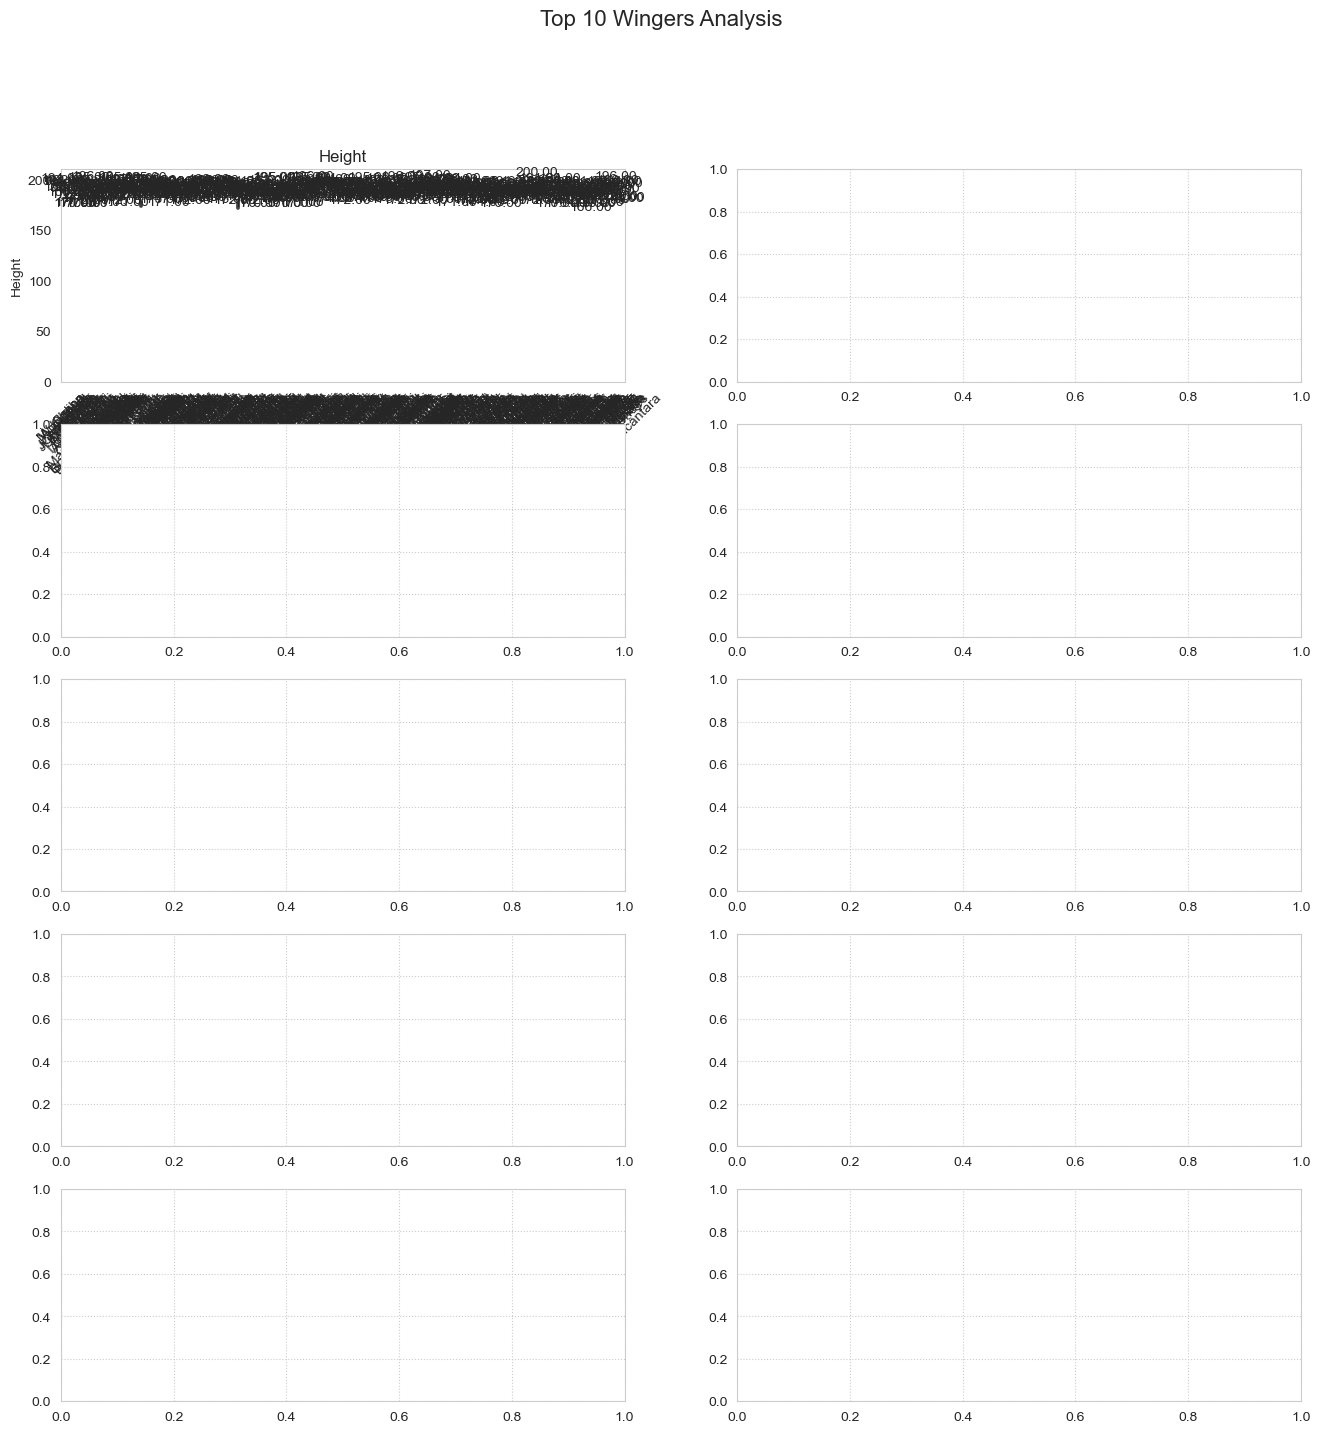

In [36]:
# Assuming 'top10_defenders' DataFrame is available

# Set up subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 16))
fig.suptitle('Top 10 Wingers Analysis', fontsize=16)

# Get numeric columns
numeric_cols = top_wingers.select_dtypes(include='number').columns

# Loop through columns and create subplots
for i, col in enumerate(numeric_cols):
    sns.barplot(x='Player', y=col, data=top_wingers, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(col)
    axes[i // 2, i % 2].tick_params(axis='x', rotation=45)

    # Add labels to the bars
    for bar in axes[i // 2, i % 2].patches:
        axes[i // 2, i % 2].annotate(f'{bar.get_height():.2f}',
                                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
nl_df['Minutes_played'].max()

495

In [ ]:
feature_combinations = []
for f1 in imp_cols:
  for f2 in imp_cols:
    if f1!=f2 and (f2,f1) not in feature_combinations:

      feature_combinations.append((f1,f2))

feature_combinations

[('Interceptions_per_90', 'Shots_blocked_per_90'),
 ('Interceptions_per_90', 'Sliding_tackles_per_90'),
 ('Interceptions_per_90', 'Accurate_passes_%'),
 ('Interceptions_per_90', 'Passes_per_90'),
 ('Shots_blocked_per_90', 'Sliding_tackles_per_90'),
 ('Shots_blocked_per_90', 'Accurate_passes_%'),
 ('Shots_blocked_per_90', 'Passes_per_90'),
 ('Sliding_tackles_per_90', 'Accurate_passes_%'),
 ('Sliding_tackles_per_90', 'Passes_per_90'),
 ('Accurate_passes_%', 'Passes_per_90')]

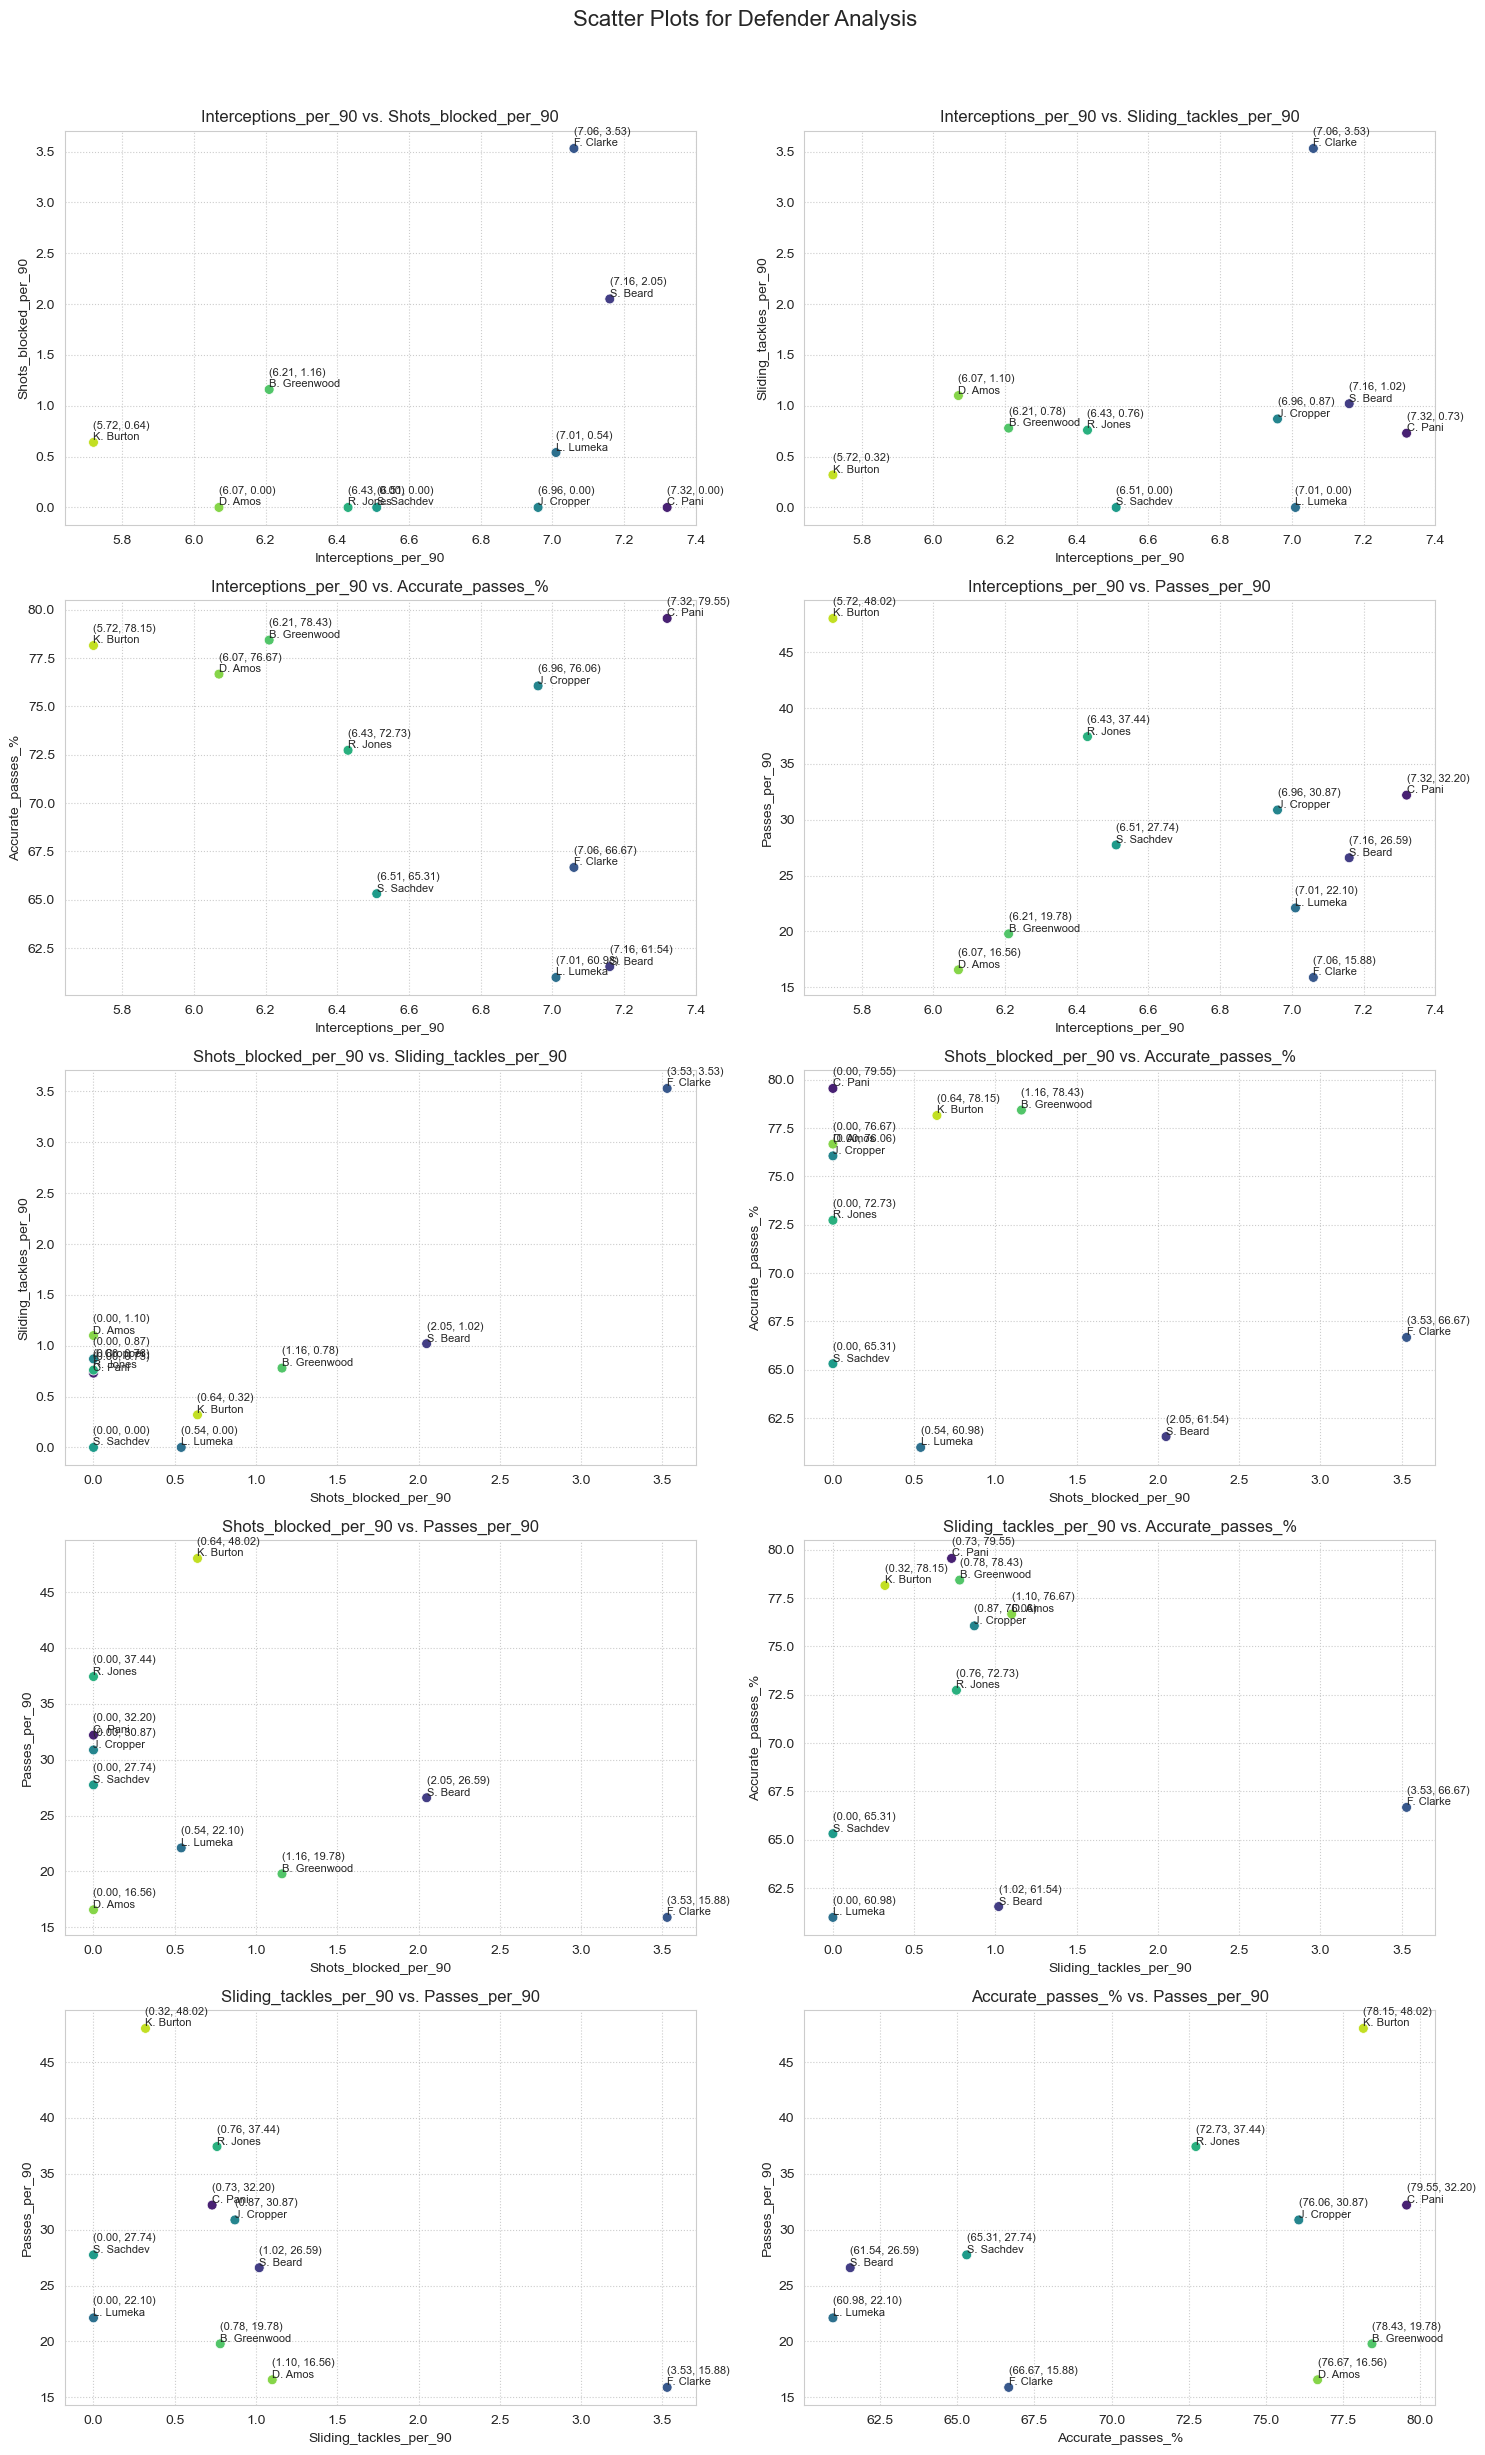

In [ ]:
def plot_scatter_plot(df):
    # Set up subplots
    num_combinations = len(feature_combinations)
    num_rows = num_combinations // 2 if num_combinations % 2 == 0 else num_combinations // 2 + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
    fig.suptitle('Scatter Plots for Defender Analysis', fontsize=16)

    # Loop through pairs of features in feature_combinations and create scatter plots
    for idx, (f1, f2) in enumerate(feature_combinations):
        row = idx // 2
        col = idx % 2
        scatter = sns.scatterplot(x=f1, y=f2, data=df, hue='Player', palette='viridis', ax=axes[row, col], s=50, edgecolor='w', linewidth=0.5)
        axes[row, col].set_title(f'{f1} vs. {f2}')
        axes[row, col].set_xlabel(f1)
        axes[row, col].set_ylabel(f2)
        axes[row, col].legend().set_visible(False)

        # Add player labels for coordinates
        for i in range(len(df)):
            scatter.text(df[f1].iloc[i], df[f2].iloc[i], f'({df[f1].iloc[i]:.2f}, {df[f2].iloc[i]:.2f})\n{df["Player"].iloc[i]}',
                         fontsize=8, ha='left', va='bottom')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Assuming 'feature_combinations' is defined somewhere before calling the function
plot_scatter_plot(top10_wingers)


In [ ]:
# plot_scatter_plot(feature1,feature2)